In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [50]:
image = cv2.imread('sar_3.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 1. Для изображения sar_3.jpg найти наиболее протяженный участок
# (выделить линии при помощи преобразования Хафа)

In [51]:
edges = cv2.Canny(image_gray, 100, 150, apertureSize=3) 
lines = cv2.HoughLines(edges, 1, np.pi/180, 140) 

# ищем самую длинную линию
max_length = 0
longest_line = None
image_with_lines = image.copy()

if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        
        # считаем длину линии
        length = np.sqrt((pt1[0] - pt2[0])**2 + (pt1[1] - pt2[1])**2)
        
        if length > max_length:
            max_length = length
            longest_line = (pt1, pt2)

# рисуем только самую длинную линию
if longest_line is not None:
    cv2.line(image_with_lines, longest_line[0], longest_line[1], (0, 165, 255), 3, cv2.LINE_AA)
    

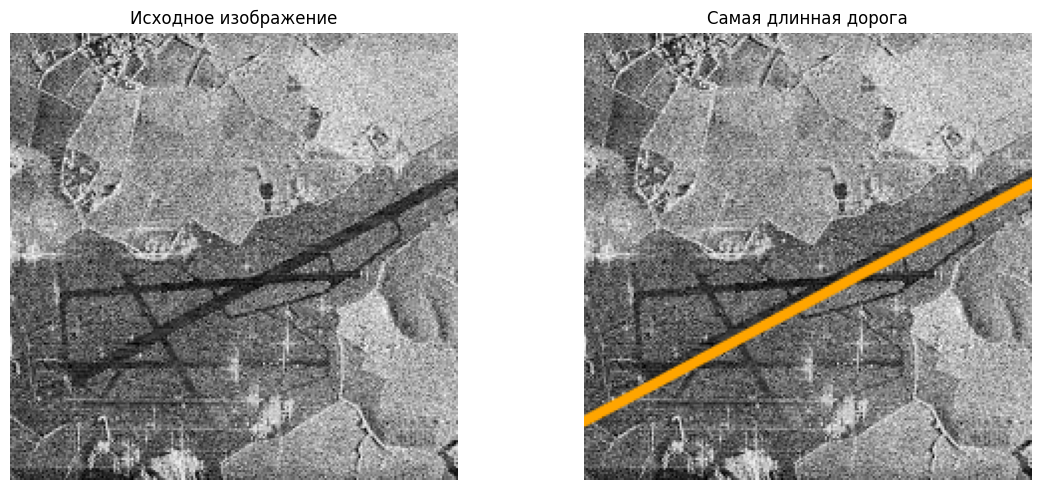

In [52]:
plt.figure(figsize=(12, 5))  

plt.subplot(1, 2, 1) 
plt.imshow(image_gray, cmap='gray')
plt.title('Исходное изображение', fontsize=12)
plt.axis('off')

plt.subplot(1, 2, 2)  
plt.imshow(cv2.cvtColor(image_with_lines, cv2.COLOR_BGR2RGB))
plt.title('Самая длинная дорога', fontsize=12)
plt.axis('off')

plt.tight_layout()
plt.show()

# 2. Для изображения sar_3.jpg провести исследование алгоритмов бинаризации, выделить участок дорожной полосы.

In [53]:
_, global_thresh = cv2.threshold(image_gray, 60, 255, cv2.THRESH_BINARY)
_, otsu_thresh = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
adaptive_thresh = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                      cv2.THRESH_BINARY, 101, 45)

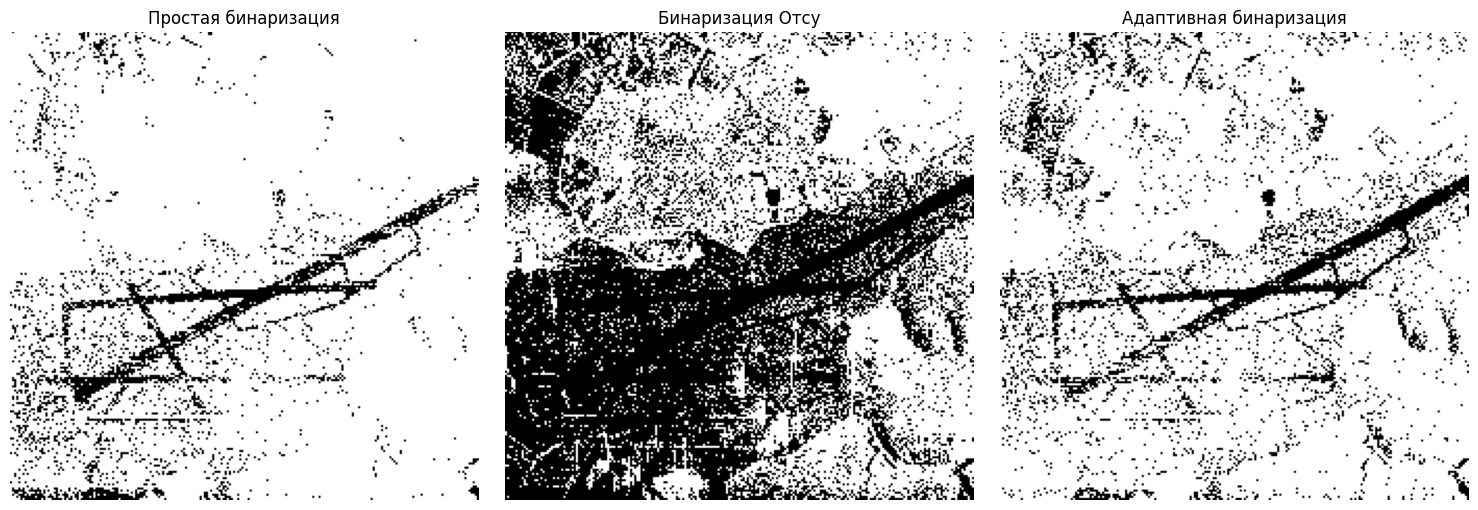

In [54]:

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 4)
plt.imshow(global_thresh, cmap='gray')
plt.title('Простая бинаризация')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(otsu_thresh, cmap='gray')
plt.title('Бинаризация Отсу')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(adaptive_thresh, cmap='gray')
plt.title('Адаптивная бинаризация')
plt.axis('off')

plt.tight_layout()
plt.show()


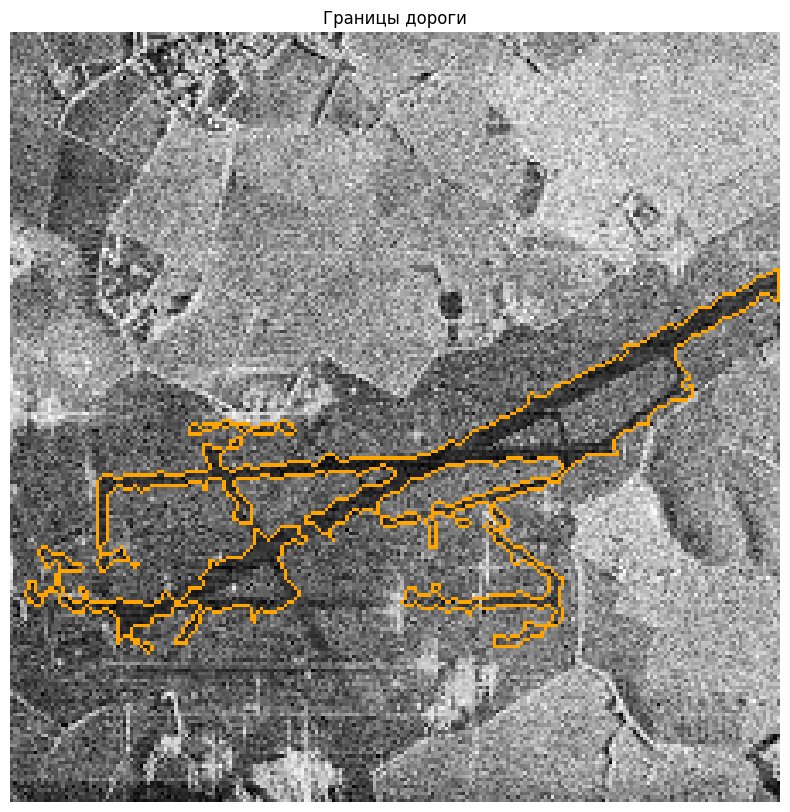

In [55]:
blurred = cv2.GaussianBlur(adaptive_thresh, (7, 7), 0)
thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
lane_image = image.copy()
if contours:
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > 500:
            cv2.drawContours(lane_image, [contour], -1, (0, 165, 255), 1    )  # Красный цвет

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(lane_image, cv2.COLOR_BGR2RGB))
plt.title('Границы дороги')
plt.axis('off')
plt.show()